<a href="https://colab.research.google.com/github/swapnilbetkar/python/blob/Dev_Self/VehicleCollision2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [164]:
#import dataset
dataset = pd.read_csv("/content/drive/MyDrive/Datasets/VehicleCollisions.csv")
pd.set_option('display.max_columns',None)
dataset.head()
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37869 entries, 0 to 37868
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Number_of_Vehicles       37869 non-null  int64 
 1   Road_Type                37869 non-null  object
 2   Speed_limit              37869 non-null  int64 
 3   Light_Conditions         37869 non-null  object
 4   Weather_Conditions       37869 non-null  object
 5   Road_Surface_Conditions  37869 non-null  object
 6   Urban_or_Rural_Area      37869 non-null  object
 7   Vehicle_Manoeuvre        37869 non-null  object
 8   1st_Point_of_Impact      37869 non-null  object
 9   Sex_of_Driver            37869 non-null  object
 10  Age_of_Driver            37869 non-null  int64 
 11  Engine_Capacity_(CC)     37869 non-null  int64 
 12  Damage                   37869 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.8+ MB
None


In [165]:
dataset['Damage'] = dataset['Damage'].map({'Severe':0, 'Light':1})
le = LabelEncoder()
categorical_features = ['Urban_or_Rural_Area','Sex_of_Driver','Road_Type','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Vehicle_Manoeuvre','1st_Point_of_Impact']
dataset[categorical_features] = dataset[categorical_features].apply(le.fit_transform)
final_data = dataset

corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

# dataset.head()
# categorical_feature = ['1st_Point_of_Impact']
# final_data = pd.get_dummies(dataset, columns = categorical_feature)
# final_data.head()

In [166]:
# dataset.head()
# categorical_feature = ['1st_Point_of_Impact']
# final_data = pd.get_dummies(dataset, columns = categorical_feature)
# final_data.head()

In [167]:
X = final_data.drop(['Road_Surface_Conditions','Damage'], axis = 1) # Features
Y = final_data['Damage'] # Labels
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(37869, 11)
(37869,)


In [168]:
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)


# Dividing dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.3, random_state = 100)

print("Number of observations in each class before oversampling (training data): \n", pd.Series(Y_train).value_counts())


smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_sample(X_train,Y_train)

print("Number of observations in each class before oversampling (training data): \n", pd.Series(Y_train).value_counts())

# rfc = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=1)
# grid_param = {'n_estimators': [30,40,50,100, 150]}

# gd_sr = GridSearchCV(estimator=rfc, param_grid=grid_param, scoring='precision', cv=5)

# """
# In the above GridSearchCV(), scoring parameter should be set as follows:
# scoring = 'accuracy' when you want to maximize prediction accuracy
# scoring = 'recall' when you want to minimize false negatives
# scoring = 'precision' when you want to minimize false positives
# scoring = 'f1' when you want to balance false positives and false negatives (place equal emphasis on minimizing both)
# """

# gd_sr.fit(X_train, Y_train)

# best_parameters = gd_sr.best_params_
# print(best_parameters)

# best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
# print(best_result)


Number of observations in each class before oversampling (training data): 
 1    24715
0     1793
Name: Damage, dtype: int64
Number of observations in each class before oversampling (training data): 
 1    24715
0    24715
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Engine_Capacity_(CC)    0.299859
Age_of_Driver           0.249104
Vehicle_Manoeuvre       0.118824
1st_Point_of_Impact     0.104872
Speed_limit             0.050402
Road_Type               0.049194
Number_of_Vehicles      0.036381
Weather_Conditions      0.034609
Light_Conditions        0.023839
Sex_of_Driver           0.020962
Urban_or_Rural_Area     0.011953
dtype: float64


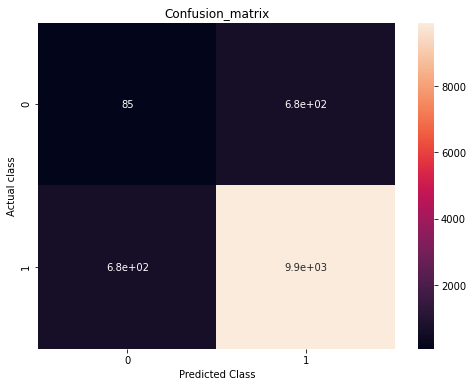

Confusion matrix: 
 [[  85  679]
 [ 684 9913]]
TP:  9913
TN:  85
FP:  679
FN:  684


In [169]:
rfc = RandomForestClassifier(n_estimators=40, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X_train,Y_train)
featimp = pd.Series(rfc.feature_importances_, index=list(X)).sort_values(ascending=False)
print(featimp)

Y_pred = rfc.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



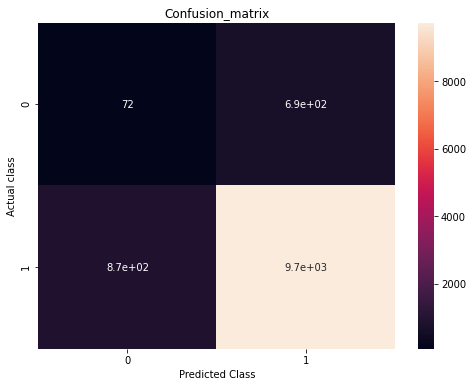

Confusion matrix: 
 [[  72  692]
 [ 866 9731]]
TP:  9731
TN:  72
FP:  692
FN:  866


In [170]:
# Selecting features with higher sifnificance and redefining feature set
X = final_data[['Engine_Capacity_(CC)', 'Age_of_Driver','Vehicle_Manoeuvre']]

feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

# Dividing dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.3, random_state = 100)

smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_sample(X_train,Y_train)

rfc = RandomForestClassifier(n_estimators=400, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X_train,Y_train)

Y_pred = rfc.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])
